## Packages

In [17]:
import os
import pandas as pd
import numpy as np

from sklearn.experimental import enable_iterative_imputer # 允许启用IterativeImputer
from sklearn.impute import SimpleImputer, IterativeImputer # 缺失值填补

from sklearn.svm import OneClassSVM # Unsupervised Outlier Detection
from sklearn.neighbors import LocalOutlierFactor #Unsupervised Outlier Detection using the Local Outlier Factor (LOF).

import matplotlib.pyplot as plt
from matplotlib import cm
from seaborn import heatmap
plt.rcParams['font.sans-serif']=['Microsoft YaHei']  #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
plt.rcParams['font.family'] = ['Microsoft YaHei'] # 上标显示正常

import warnings
warnings.filterwarnings("ignore") # 减少warning显示，为了页面整洁
from tqdm import tqdm # 进度条

In [18]:
idir = os.getcwd()

## Switchs

In [19]:
## VOCs
VOC_negative='NaN'           # 'remove' 删除有负值的行
                             # 'NaN' 负值替换为缺失值 这里不能用NaN
                             # 'None' 不处理负值数据 这里不能用None

VOC_as='Class'          # 'Class' VOC分类加和
                        # 'One'   VOC 全部求和 总VOCs
                        # 'None'  不处理
        
VOC_outlier='OneClassSVM'   # 'Q3media' 四分位剔除上界 中度异常 Q3+1.5(Q3-Q1)
                        # 'Q3max' 四分位剔除上界 极度异常 Q3+3(Q3-Q1)
                        # 'OneClassSVM' 一分类支持向量机剔除异常值
                        # 'LocalOutlierFactor' LOF,局部异常因子法剔除异常值
                        # 'None' 不剔除异常值
                
outliers_fraction=0.1   # 存在1%的异常值，该参数用于'OneClaseeSVM'，'LocalOutlierFactor'
VOC_plot=0              # 0 不打开任何绘图
                        # 1 剔除异常后绘图
                        # 2 剔除异常前后两次绘图
        
# 此处填补的缺失值为分类加和或总VOCs处理后的缺失值
VOC_NaN='iterative'          # 'mean' 均值填补缺失值NaN
                             # 'media' 中位数填补缺失值
                             # 'iterative' 估算填补特征值
                             # 'dropna' 删除缺失值的行
                             # 'None' 不处理缺失数据
                
## 总辐射
fillblank=True          # 缺失数值用0填补 包括辐射和总辐射
Radio_replace0='Zero'   # 'Zero' 总辐射负值替换为0
                        # 'None' 不处理负值

## 气象仪    
Met_NaN='iterative'          # 'mean' 均值填补缺失值NaN
                             # 'media' 中位数填补缺失值
                             # 'iterative' 估算填补特征值
                             # 'dropna' 删除缺失值的行
                             # 'None' 不处理缺失数据
## 气体分析仪数据
Gas_negative='NaN'           # 'remove' 删除有负值的行
                             # 'NaN' 负值替换为缺失值
                             # 'None' 不处理负值数据
        
Gas_NaN='media'              # 'mean' 均值填补缺失值NaN
                             # 'media' 中位数填补缺失值
                             # 'iterative' 估算填补特征值
                             # 'dropna' 删除缺失值的行
                             # 'None' 不处理缺失数据
            
## 颗粒物
Par_negative_before='NaN'    # 'remove' 删除有负值的行
                             # 'NaN' 负值替换为缺失值
                             # 'None' 不处理负值数据
Par_negative_after='remove'  # 'remove' 删除有负值的行
                             # 'NaN' 负值替换为缺失值 这里不能用NaN
                             # 'None' 不处理负值数据 这里不能用None

Par_NaN='iterative'          # 'mean' 均值填补缺失值NaN
                             # 'media' 中位数填补缺失值
                             # 'iterative' 估算填补特征值
                             # 'dropna' 删除缺失值的行
                             # 'None' 不处理缺失数据
## 能见度
Visibility_NaN='iterative'   # 'mean' 均值填补缺失值NaN
                             # 'media' 中位数填补缺失值
                             # 'iterative' 估算填补特征值
                             # 'dropna' 删除缺失值的行
                             # 'None' 不处理缺失数据
## OCEC
OCEC_NaN='iterative'         # 'mean' 均值填补缺失值NaN
                             # 'media' 中位数填补缺失值
                             # 'iterative' 估算填补特征值
                             # 'dropna' 删除缺失值的行
                             # 'None' 不处理缺失数据
##PAN
PAN_NaN='iterative'  
##粒径谱仪
Size_NaN='iterative'

## Radiation

In [32]:
idir_UVAB = idir+'\\UV辐射计\\'
file_UVAB = os.listdir(idir_UVAB)

In [33]:
df_UVAB = pd.DataFrame()
for i in tqdm(file_UVAB):
    file = idir_UVAB+i
    _df_UVAB = pd.read_excel(file, skiprows=1, parse_dates=['时间'], na_values='--')
    df_UVAB = pd.concat([df_UVAB, _df_UVAB])

100%|██████████| 23/23 [00:00<00:00, 38.36it/s]


In [34]:
if fillblank:
    df_UVAB = df_UVAB.fillna(0)

In [35]:
df_UVAB.to_csv('UVAB.csv', index=False, encoding='utf_8_sig')
print('save to UVAB.csv !!!')

save to UVAB.csv !!!


## Solar radiation

In [36]:
idir_Radio = idir+'\\总辐射计\\'
file_Radio = os.listdir(idir_Radio)

In [37]:
df_Radio = pd.DataFrame()
for i in tqdm(file_Radio):
    file = idir_Radio+i
    _df_Radio = pd.read_excel(file, skiprows=1, parse_dates=['时间'], na_values='--')
    df_Radio = pd.concat([df_Radio, _df_Radio])

100%|██████████| 23/23 [00:00<00:00, 41.09it/s]


In [38]:
if fillblank:
    df_Radio = df_Radio.fillna(0)

In [39]:
if Radio_replace0=='Zero':
    df_Radio['太阳总辐射'][df_Radio['太阳总辐射']<0]=0 # 替换负值为0

In [40]:
df_Radio.to_csv('Radio.csv', index=False, encoding='utf_8_sig')
print('save to Radio.csv !!!')

save to Radio.csv !!!


## VOCs

In [20]:
idir_VOC = idir+'\\VOCs\\'
file_VOC = os.listdir(idir_VOC)

In [21]:
df_VOC = pd.DataFrame()
for i in tqdm(file_VOC):
    file = idir_VOC+i
    _df_VOC = pd.read_excel(file, skiprows=1, parse_dates=['时间'], na_values='--')
    df_VOC = pd.concat([df_VOC, _df_VOC])
    df_VOC = df_VOC.sort_values(by=['时间'])
df_VOC = df_VOC.reset_index(drop=True)

100%|██████████| 23/23 [00:04<00:00,  4.99it/s]


In [22]:
if VOC_plot==2:
    fig = plt.figure(figsize=(20,120))
    plt.subplots_adjust(hspace=0.4,wspace=0.15)
    for i,j in enumerate(tqdm(df_VOC.columns[2:])):
        #print(i,j, "\t")
        plt.subplot(round(df_VOC.columns.size/3),3,i+1)
        plt.plot(df_VOC[j])
        plt.title(str(i+1)+'. '+j, fontsize=20)

In [52]:
# 剔除异常
voc_Q3=df_VOC.quantile(.75)
voc_Q1=df_VOC.quantile(.25)
voc_IQR=voc_Q3-voc_Q1
voc_name = voc_IQR.index # 108种voc

if VOC_outlier=='Q3median':
    print('drop outlier by Q3median')
    k=1.5
    voc_max=voc_Q3+k*voc_IQR
    for i,j in enumerate(tqdm(voc_name)):
        # print(i,j)
        df_VOC[j][df_VOC[j]>voc_max[j]]=np.nan
elif VOC_outlier=='Q3max':
    print('drop outlier by Q3max')
    k=3
    voc_max=voc_Q3+k*voc_IQR
    for i,j in enumerate(tqdm(voc_name)):
        # print(i,j)
        df_VOC[j][df_VOC[j]>voc_max[j]]=np.nan
elif VOC_outlier=='OneClassSVM':
    print('drop outlier by OneClassSVM')
    for i,j in enumerate(tqdm(voc_name)):
        voc_outiler_model = OneClassSVM(nu=outliers_fraction, kernel="rbf", gamma='scale')
        voc_input_df = df_VOC[j][df_VOC[j].notna()] # 取非NaN列数据
        voc_input_array = voc_input_df.array.reshape(-1,1) # 转换数据为OneClassSVM输入数据格式
        voc_outiler_model.fit(voc_input_array) # OneClassSVM分类结果，1和-1，-1为异常
        voc_outlier_results = voc_outiler_model.predict(voc_input_array)
        voc_outlier_index = voc_input_df[voc_outlier_results==-1].index # 获取异常索引位置
        df_VOC[j].loc[voc_outlier_index]=np.nan # 对异常值负值为NaN
elif VOC_outlier=='LocalOutlierFactor':
    print('drop outlier by LocalOutlierFactor')
    for i,j in enumerate(tqdm(voc_name)):
        voc_outiler_model = LocalOutlierFactor(n_neighbors=35, contamination=outliers_fraction)
        voc_input_df = df_VOC[j][df_VOC[j].notna()] # 取非NaN列数据
        voc_input_array = voc_input_df.array.reshape(-1,1) # 转换数据为LocalOutlierFactor输入数据格式
        voc_outlier_results = voc_outiler_model.fit_predict(voc_input_array)
        voc_outlier_index = voc_input_df[voc_outlier_results==-1].index # 获取异常索引位置
        df_VOC[j].loc[voc_outlier_index]=np.nan # 对异常值负值为NaN        
else:
    pass

drop outlier by OneClassSVM


100%|██████████| 108/108 [05:02<00:00,  2.80s/it]


In [23]:
# 分类加和
if VOC_as=='Class':
    VOCclass={"芳香烃类总值":["苯(ppb)","甲苯(ppb)","乙基苯(ppb)","邻二甲苯(ppb)","异丙基苯(ppb)","正丙苯(ppb)","间-乙基甲苯(ppb)","对-乙基甲苯(ppb)","1,3,5-三甲基苯(ppb)","1,2,4-三甲基苯(ppb)","1,2,3-三甲基苯(ppb)","间-二乙基苯(ppb)","对-二乙基苯(ppb)","4-乙基甲苯(ppb)","萘(ppb)","间/对-二甲苯(ppb)"],\
          "卤代总值":["二氯二氟甲烷(ppb)","1,1,2,2-四氟-1,2-二氯乙烷(ppb)","一氯甲烷(ppb)","氯乙烯(ppb)","溴甲烷(ppb)","氯乙烷(ppb)","Freon-11(ppb)","1,1-二氯乙烯(ppb)","1,1,2-三氯-1,2,2-三氟乙烷(ppb)","二氯甲烷(ppb)","1,1-二氯乙烷(ppb)","顺式-1,2-二氯乙烯(ppb)","三氯甲烷(ppb)","1,1,1-三氯乙烷(ppb)","四氯化碳(ppb)","1,2-二氯乙烷(ppb)","三氯乙烯(ppb)","1,2-二氯丙烷(ppb)","一溴二氯甲烷(ppb)","反式-1,3-二氯丙烯(ppb)","顺式-1,3-二氯丙烯(ppb)","1,1,2-三氯乙烷(ppb)","四氯乙烯(ppb)","1,2-二溴乙烷(ppb)","氯苯(ppb)","三溴甲烷(ppb)","1,1,2,2-四氯乙烷(ppb)","1,3-二氯苯(ppb)","1,2-二氯苯(ppb)","反式-1,2-二氯乙烯(ppb)","二溴一氯甲烷(ppb)","1,4-二氯苯(ppb)","苄基氯（氯甲苯）(ppb)","1,2,4-三氯苯(ppb)","六氯丁二烯(ppb)"],\
          "烷烃类总值":["2,2-二甲基丁烷(ppb)","3-甲基戊烷(ppb)","正己烷(ppb)","2-甲基己烷(ppb)","2,3-二甲基戊烷(ppb)","3-甲基己烷(ppb)","2,2,4-三甲基戊烷(ppb)","正庚烷(ppb)","2,3,4-三甲基戊烷(ppb)","2-甲基庚烷(ppb)","3-甲基庚烷(ppb)","正辛烷(ppb)","正壬烷(ppb)","正癸烷(ppb)","正十一烷(ppb)","正十二烷(ppb)","乙烷(ppb)","丙烷(ppb)","异丁烷(ppb)","正丁烷(ppb)","异戊烷(ppb)","戊烷(ppb)","2,3-二甲基丁烷(ppb)","2-甲基戊烷(ppb)","2,4-二甲基戊烷(ppb)"], \
          "环烷烃总值":["环己烷(ppb)","甲基环己烷(ppb)","环戊烷(ppb)","甲基环戊烷(ppb)"], \
          "烯烃总值":["1-己烯(ppb)","苯乙烯(ppb)","乙烯(ppb)","丙烯(ppb)","反-2-丁烯(ppb)","1-丁烯(ppb)","顺-2-丁烯(ppb)","反式-2-戊烯(ppb)","1-戊烯(ppb)","顺式-2-戊烯(ppb)","异戊二烯(L)(ppb)","1,3-丁二烯(ppb)","异戊二烯(H)(ppb)"],\
          "炔烃":["乙炔(ppb)"],\
          "含氧有机物总值":["1,4二氧六环(ppb)","丙烯醛(ppb)","丙酮(ppb)","甲基叔丁基醚(ppb)","乙醇(ppb)","异丙醇(ppb)","醋酸乙烯酯(ppb)","乙酸乙酯(ppb)","2-丁酮(ppb)","四氢呋喃(ppb)","甲基丙烯酸甲酯(ppb)","4-甲基-2-戊酮(ppb)","2-己酮(ppb)"],\
          "TVOC":["芳香烃类总值","卤代总值","烷烃类总值","环烷烃总值","烯烃总值","炔烃","含氧有机物总值"]}

    df_VOC["芳香烃类总值"] = df_VOC[VOCclass["芳香烃类总值"]].sum(axis=1)
    df_VOC["卤代总值"] = df_VOC[VOCclass["卤代总值"]].sum(axis=1)
    df_VOC["烷烃类总值"] = df_VOC[VOCclass["烷烃类总值"]].sum(axis=1)
    df_VOC["环烷烃总值"] = df_VOC[VOCclass["环烷烃总值"]].sum(axis=1)
    df_VOC["烯烃总值"] = df_VOC[VOCclass["烯烃总值"]].sum(axis=1)
    df_VOC["炔烃"] = df_VOC[VOCclass["炔烃"]]
    df_VOC["含氧有机物总值"] = df_VOC[VOCclass["含氧有机物总值"]].sum(axis=1)
    df_VOC["TVOC"] = df_VOC[VOCclass["TVOC"]].sum(axis=1)
    

    df_VOC = df_VOC[["站点","时间","芳香烃类总值","卤代总值","烷烃类总值","环烷烃总值","烯烃总值","炔烃","含氧有机物总值", "TVOC"]]
 
    
elif VOC_as=='One':
    VOCclass={"TVOC":["苯(ppb)","甲苯(ppb)","乙基苯(ppb)","邻二甲苯(ppb)","异丙基苯(ppb)","正丙苯(ppb)","间-乙基甲苯(ppb)","对-乙基甲苯(ppb)","1,3,5-三甲基苯(ppb)","1,2,4-三甲基苯(ppb)","1,2,3-三甲基苯(ppb)","间-二乙基苯(ppb)","对-二乙基苯(ppb)","4-乙基甲苯(ppb)","萘(ppb)","间/对-二甲苯(ppb)",
                      "二氯二氟甲烷(ppb)","1,1,2,2-四氟-1,2-二氯乙烷(ppb)","一氯甲烷(ppb)","氯乙烯(ppb)","溴甲烷(ppb)","氯乙烷(ppb)","Freon-11(ppb)","1,1-二氯乙烯(ppb)","1,1,2-三氯-1,2,2-三氟乙烷(ppb)","二氯甲烷(ppb)","1,1-二氯乙烷(ppb)","顺式-1,2-二氯乙烯(ppb)","三氯甲烷(ppb)","1,1,1-三氯乙烷(ppb)","四氯化碳(ppb)","1,2-二氯乙烷(ppb)","三氯乙烯(ppb)","1,2-二氯丙烷(ppb)","一溴二氯甲烷(ppb)","反式-1,3-二氯丙烯(ppb)","顺式-1,3-二氯丙烯(ppb)","1,1,2-三氯乙烷(ppb)","四氯乙烯(ppb)","1,2-二溴乙烷(ppb)","氯苯(ppb)","三溴甲烷(ppb)","1,1,2,2-四氯乙烷(ppb)","1,3-二氯苯(ppb)","1,2-二氯苯(ppb)","反式-1,2-二氯乙烯(ppb)","二溴一氯甲烷(ppb)","1,4-二氯苯(ppb)","苄基氯（氯甲苯）(ppb)","1,2,4-三氯苯(ppb)","六氯丁二烯(ppb)",
                      "2,2-二甲基丁烷(ppb)","3-甲基戊烷(ppb)","正己烷(ppb)","2-甲基己烷(ppb)","2,3-二甲基戊烷(ppb)","3-甲基己烷(ppb)","2,2,4-三甲基戊烷(ppb)","正庚烷(ppb)","2,3,4-三甲基戊烷(ppb)","2-甲基庚烷(ppb)","3-甲基庚烷(ppb)","正辛烷(ppb)","正壬烷(ppb)","正癸烷(ppb)","正十一烷(ppb)","正十二烷(ppb)","乙烷(ppb)","丙烷(ppb)","异丁烷(ppb)","正丁烷(ppb)","异戊烷(ppb)","戊烷(ppb)","2,3-二甲基丁烷(ppb)","2-甲基戊烷(ppb)","2,4-二甲基戊烷(ppb)", "环己烷(ppb)","甲基环己烷(ppb)","环戊烷(ppb)","甲基环戊烷(ppb)", 
                      "1-己烯(ppb)","苯乙烯(ppb)","乙烯(ppb)","丙烯(ppb)","反-2-丁烯(ppb)","1-丁烯(ppb)","顺-2-丁烯(ppb)","反式-2-戊烯(ppb)","1-戊烯(ppb)","顺式-2-戊烯(ppb)","异戊二烯(L)(ppb)","1,3-丁二烯(ppb)","异戊二烯(H)(ppb)",
                      "乙炔(ppb)","1,4二氧六环(ppb)","丙烯醛(ppb)","丙酮(ppb)","甲基叔丁基醚(ppb)","乙醇(ppb)","异丙醇(ppb)","醋酸乙烯酯(ppb)","乙酸乙酯(ppb)","2-丁酮(ppb)","四氢呋喃(ppb)","甲基丙烯酸甲酯(ppb)","4-甲基-2-戊酮(ppb)","2-己酮(ppb)"]}

    df_VOC["TVOC"] = df_VOC[VOCclass["TVOC"]].sum(axis=1)
    
    df_VOC = df_VOC[["站点","时间","TVOC"]]

else:
    pass

In [24]:
if VOC_as=='Class':
    if VOC_NaN=='mean':
        df_VOC=df_VOC.fillna(df_VOC.mean()["芳香烃类总值":"TVOC"])
    elif VOC_NaN=='media':
        df_VOC=df_VOC.fillna(df_VOC.median()["芳香烃类总值":"TVOC"])
    elif VOC_NaN=='iterative':
        VOC_nan_model=IterativeImputer(random_state=0)
        VOC_nan_result=VOC_nan_model.fit_transform(df_VOC.loc[:,"芳香烃类总值":"TVOC"])
        df_VOC.loc[:,"芳香烃类总值":"TVOC"]=VOC_nan_result
    elif VOC_NaN=='dropna':
        df_VOC=df_VOC.dropna()
    else:
        pass
elif VOC_as=='One':
    if VOC_NaN=='mean':
        df_VOC=df_VOC.fillna(df_VOC.mean()["TVOC"])
    elif VOC_NaN=='media':
        df_VOC=df_VOC.fillna(df_VOC.median()["TVOC"])
    elif VOC_NaN=='iterative':
        VOC_nan_model=IterativeImputer(random_state=0)
        VOC_nan_result=VOC_nan_model.fit_transform(df_VOC.loc[:,"TVOC"].values.reshape(-1,1))
        df_VOC.loc[:,"TVOC"]=VOC_nan_result
    elif VOC_NaN=='dropna':
        df_VOC=df_VOC.dropna()
    else:
        pass
elif VOC_as=='None':
    if VOC_NaN=='mean':
        df_VOC=df_VOC.fillna(df_VOC.mean()["2,2-二甲基丁烷(ppb)":"异戊二烯(H)(ppb)"])
    elif VOC_NaN=='media':
        df_VOC=df_VOC.fillna(df_VOC.median()["2,2-二甲基丁烷(ppb)":"异戊二烯(H)(ppb)"])
    elif VOC_NaN=='iterative':
        VOC_nan_model=IterativeImputer(random_state=0)
        VOC_nan_result=VOC_nan_model.fit_transform(df_VOC.loc[:,"2,2-二甲基丁烷(ppb)":"异戊二烯(H)(ppb)"])
        df_VOC.loc[:,"2,2-二甲基丁烷(ppb)":"异戊二烯(H)(ppb)"]=VOC_nan_result
    elif VOC_NaN=='dropna':
        df_VOC=df_VOC.dropna()
    else:
        pass

In [26]:
df_VOC.to_csv('VOC_test1028.csv', index=False, encoding='utf_8_sig')
print('save to VOC_test1028.csv !!!')

save to VOC_test1028.csv !!!


In [27]:
if VOC_plot==1 or VOC_plot==2:
    fig = plt.figure(figsize=(20,120))
    plt.subplots_adjust(hspace=0.4,wspace=0.15)
    for i,j in enumerate(tqdm(df_VOC.columns[2:])):
        #print(i,j, "\t")
        plt.subplot(round(df_VOC.columns.size/3),3,i+1)
        plt.plot(df_VOC[j])
        plt.title(str(i+1)+'. '+j, fontsize=20)

In [28]:
# df_VOC = df_VOC.reset_index(drop=True)
columns_VOC = list(df_VOC.columns[2:])
if VOC_negative =='remove':
    for i in tqdm(columns_VOC):
        df_VOC=df_VOC.drop(df_VOC[df_VOC[i]<0].index)
elif VOC_negative =='NaN':
    for i in tqdm(columns_VOC):
        df_VOC[i][df_VOC[i]<0]=np.nan
else:
    pass

100%|██████████| 8/8 [00:00<00:00, 666.85it/s]


In [29]:
df_VOC.to_csv('VOC_test1028.csv', index=False, encoding='utf_8_sig')
print('save to VOC_test1028.csv !!!')

save to VOC_test1028.csv !!!


In [30]:
df_VOC.describe().T

,count,mean,std,min,25%,50%,75%,max
芳香烃类总值,19019.0,18.211651,402.431396,0.000000e+00,0.3270,1.521,3.7455,34790.763
卤代总值,19019.0,71.204346,1752.677984,0.000000e+00,0.9590,2.275,4.4535,148794.667
烷烃类总值,19019.0,27.811506,310.390943,0.000000e+00,5.4140,10.668,18.2170,18871.239
环烷烃总值,19019.0,7.351465,193.017439,0.000000e+00,0.1330,0.302,0.7080,16541.772
烯烃总值,19019.0,11.684670,153.716523,0.000000e+00,1.3925,2.960,6.7525,12666.698
炔烃,16857.0,2.822125,3.860657,5.329071e-15,0.9390,1.593,3.1690,143.950
含氧有机物总值,19019.0,84.588162,1888.087208,0.000000e+00,2.2625,10.003,19.4245,156715.090
TVOC,19019.0,223.353119,3767.122728,0.000000e+00,17.7345,32.563,57.2840,246943.881


## Met

In [42]:
idir_Met = idir+'\\气象仪\\'
file_Met = os.listdir(idir_Met)

In [43]:
file_Met = [i for i in file_Met if '.xls' in i]

In [44]:
df_Met = pd.DataFrame()
for i in tqdm(file_Met):
    file = idir_Met+i
    _df_Met = pd.read_excel(file, skiprows=1, parse_dates=['时间'], na_values='--')
    df_Met = pd.concat([df_Met, _df_Met])

100%|██████████| 23/23 [00:00<00:00, 30.93it/s]


In [45]:
if Met_NaN=='mean':
    df_Met=df_Met.fillna(df_Met.mean()["压强":"温度"])
elif Met_NaN=='media':
    df_Met=df_Met.fillna(df_Met.median()["压强":"温度"])
elif Met_NaN=='iterative':
    Met_nan_model=IterativeImputer(random_state=0)
    Met_nan_result=Met_nan_model.fit_transform(df_Met.loc[:,"压强":"温度"])
    df_Met.loc[:,"压强":"温度"]=Met_nan_result
elif Met_NaN=='dropna':
    df_Met=df_Met.dropna()
else:
    pass

In [46]:
df_Met.loc[:,"压强":"温度"]

,压强,湿度(%),风速(m/s),风向(°),温度
0,83.900,57.260,1.553,81.267,18.888
1,83.900,59.530,1.398,85.283,18.352
2,83.900,61.812,0.952,79.517,17.828
3,83.900,64.628,0.295,71.933,17.098
4,83.900,69.860,0.138,151.867,16.187
...,...,...,...,...,...
1460,84.000,21.948,1.317,119.650,24.768
1461,84.068,22.461,0.815,101.610,23.559
1462,84.193,28.515,0.690,74.220,22.412
1463,84.200,32.082,0.145,35.000,21.409


In [47]:
df_Met.to_csv('Met.csv', index=False, encoding='utf_8_sig')
print('save to Met.csv !!!')

save to Met.csv !!!


## Gas

In [48]:
idir_Gas = idir+'\\气体分析仪\\'
file_Gas = os.listdir(idir_Gas)

In [49]:
df_Gas = pd.DataFrame()
for i in tqdm(file_Gas):
    file = idir_Gas+i
    _df_Gas = pd.read_excel(file, skiprows=1, parse_dates=['时间'], na_values='--')
    df_Gas = pd.concat([df_Gas, _df_Gas])
    df_Gas = df_Gas.sort_values(by=['时间'])
df_Gas = df_Gas.reset_index(drop=True)

100%|██████████| 23/23 [00:00<00:00, 25.45it/s]


In [50]:
columns_Gas = ['SO₂-二氧化硫(μg/m³)', 
                  'NOx-氮氧化合物(μg/m³)', 
                  'NO-一氧化氮(μg/m³)', 
                  'NO₂-二氧化氮(μg/m³)', 
                  'CO-一氧化碳(mg/m³)', 
                  'O₃-臭氧(μg/m³)']

In [51]:
if Gas_negative =='remove':
    for i in tqdm(columns_Gas):
        df_Gas=df_Gas.drop(df_Gas[df_Gas[i]<0].index)
elif Gas_negative =='NaN':
    for i in tqdm(columns_Gas):
        df_Gas[i][df_Gas[i]<0]=np.nan
else:
    pass

100%|██████████| 6/6 [00:00<00:00, 859.69it/s]


In [52]:
if Gas_NaN=='mean':
    df_Gas=df_Gas.fillna(df_Gas.mean()["SO₂-二氧化硫(μg/m³)":"O₃-臭氧(μg/m³)"])
elif Gas_NaN=='media':
    df_Gas=df_Gas.fillna(df_Gas.median()["SO₂-二氧化硫(μg/m³)":"O₃-臭氧(μg/m³)"])
elif Gas_NaN=='iterative':
    Gas_nan_model=IterativeImputer(random_state=0)
    Gas_nan_result=Gas_nan_model.fit_transform(df_Gas.loc[:,'SO₂-二氧化硫(μg/m³)':'O₃-臭氧(μg/m³)'])
    df_Gas.loc[:,'SO₂-二氧化硫(μg/m³)':'O₃-臭氧(μg/m³)']=Gas_nan_result
elif Gas_NaN=='dropna':
    df_Gas=df_Gas.dropna()
else:
    pass

In [53]:
df_Gas.to_csv('Gas.csv', index=False, encoding='utf_8_sig')
print('save to Gas.csv !!!')

save to Gas.csv !!!


## Par

In [54]:
idir_Par = idir+'\\颗粒物\\'
file_Par = os.listdir(idir_Par)

In [55]:
df_Par = pd.DataFrame()
for i in tqdm(file_Par):
    file = idir_Par+i
    _df_Par = pd.read_excel(file, skiprows=1, parse_dates=['时间'], na_values='--')
    df_Par = pd.concat([df_Par, _df_Par])
    df_Par = df_Par.sort_values(by=['时间'])

100%|██████████| 23/23 [00:00<00:00, 31.72it/s]


In [56]:
df_Par = df_Par.reset_index(drop=True)
columns_Par = ['PM₁₀(μg/m³)',
               'PM₂.₅(ug/m³)',
               'PM₁(μg/m³)',
               'TSP(μg/m³)']

In [57]:
if Par_negative_before =='remove':
    for i in tqdm(columns_Par):
        df_Par=df_Par.drop(df_Par[df_Par[i]<0].index)
elif Par_negative_before =='NaN':
    for i in tqdm(columns_Par):
        df_Par[i][df_Par[i]<0]=np.nan
else:
    pass

100%|██████████| 4/4 [00:00<00:00, 668.26it/s]


In [58]:
if Par_NaN=='mean':
    df_Par=df_Par.fillna(df_Par.mean()['PM₁₀(μg/m³)':'TSP(μg/m³)'])
elif Par_NaN=='media':
    df_Par=df_Par.fillna(df_Par.median()['PM₁₀(μg/m³)':'TSP(μg/m³)'])
elif Par_NaN=='iterative':
    Par_nan_model=IterativeImputer(random_state=0)
    Par_nan_result=Par_nan_model.fit_transform(df_Par.loc[:,'PM₁₀(μg/m³)':'TSP(μg/m³)'])
    df_Par.loc[:,'PM₁₀(μg/m³)':'TSP(μg/m³)']=Par_nan_result
elif df_Par=='dropna':
    df_Par=df_Par.dropna()
else:
    pass

In [59]:
df_Par.loc[:,'PM₁₀(μg/m³)':'TSP(μg/m³)']

,PM₁₀(μg/m³),PM₂.₅(ug/m³),PM₁(μg/m³),TSP(μg/m³)
0,92.56869,40.517261,22.320309,117.74158
1,92.56869,40.517261,22.320309,117.74158
2,92.56869,40.517261,22.320309,117.74158
3,92.56869,40.517261,22.320309,117.74158
4,92.56869,40.517261,22.320309,117.74158
...,...,...,...,...
19014,39.39500,18.343000,9.481000,57.50800
19015,50.17200,23.673000,12.190000,72.53900
19016,49.11100,24.146000,13.729000,69.55900
19017,59.21700,28.557000,16.493000,87.52300


In [60]:
if Par_negative_after =='remove':
    for i in tqdm(columns_Par):
        df_Par=df_Par.drop(df_Par[df_Par[i]<0].index)
elif Par_negative_after =='NaN':
    for i in tqdm(columns_Par):
        df_Par[i][df_Par[i]<0]=np.nan
else:
    pass

100%|██████████| 4/4 [00:00<00:00, 267.39it/s]


In [61]:
df_Par.to_csv('Par.csv', index=False, encoding='utf_8_sig')
print('save to Par.csv !!!')

save to Par.csv !!!


## Size

In [62]:
idir_Size = idir+'\\粒径谱仪\\'
file_Size = os.listdir(idir_Size)

In [63]:
df_Size = pd.DataFrame()
for i in tqdm(df_Size):
    file = idir_Size+i
    _df_Size = pd.read_excel(file, skiprows=1, parse_dates=['采集时间'], na_values='--')
    df_Size = pd.concat([df_Size, _df_Size])

0it [00:00, ?it/s]


In [64]:
#if Size_NaN=='mean':
#    df_Size=df_Size.fillna(df_Size.mean()['PM0_25(个/m^3)':'PM0_28(个/m^3)':'PM0_30(个/m^3)':'PM0_35(个/m^3)':'PM0_40(个/m^3)':'PM0_45(个/m^3)':'PM0_50(个/m^3)':'PM0_58(个/m^3)':'PM0_65(个/m^3)': 'PM0_70(个/m^3)':'PM0_80(个/m^3)':'PM1_00(个/m^3)':'PM1_30(个/m^3)':'PM1_60(个/m^3)':'PM10_0(个/m^3)':'PM12_5(个/m^3)':'PM15_0(个/m^3)':'PM17_5(个/m^3)':'PM2_00(个/m^3)':'PM2_5(个/m^3)':'PM2_50(个/m^3)':'PM20_0(个/m^3)':'PM25_0(个/m^3)':'PM3_0(个/m^3)':'PM3_5(个/m^3)':'PM30_0(个/m^3)':'PM32_0(个/m^3)': 'PM4_0(个/m^3)':'PM5_0(个/m^3)':'PM6_5(个/m^3)':'PM7_5(个/m^3)':'PM8_0(个/m^3)'])
#elif Size_NaN=='media':
   # df_Size=df_Size.fillna(df_Size.median()['PM0_25(个/m^3)':'PM0_28(个/m^3)':'PM0_30(个/m^3)':'PM0_35(个/m^3)':'PM0_40(个/m^3)':'PM0_45(个/m^3)':'PM0_50(个/m^3)':'PM0_58(个/m^3)':'PM0_65(个/m^3)': 'PM0_70(个/m^3)':'PM0_80(个/m^3)':'PM1_00(个/m^3)':'PM1_30(个/m^3)':'PM1_60(个/m^3)':'PM10_0(个/m^3)':'PM12_5(个/m^3)':'PM15_0(个/m^3)':'PM17_5(个/m^3)':'PM2_00(个/m^3)':'PM2_5(个/m^3)':'PM2_50(个/m^3)':'PM20_0(个/m^3)':'PM25_0(个/m^3)':'PM3_0(个/m^3)':'PM3_5(个/m^3)':'PM30_0(个/m^3)':'PM32_0(个/m^3)': 'PM4_0(个/m^3)':'PM5_0(个/m^3)':'PM6_5(个/m^3)':'PM7_5(个/m^3)':'PM8_0(个/m^3)'])
#elif Size_NaN=='iterative':
   # Size_nan_model=IterativeImputer(random_state=0)
   # Size_nan_result=Size_nan_model.fit_transform(df_Size.loc[:,'PM0_25(个/m^3)':'PM0_28(个/m^3)':'PM0_30(个/m^3)':'PM0_35(个/m^3)':'PM0_40(个/m^3)':'PM0_45(个/m^3)':'PM0_50(个/m^3)':'PM0_58(个/m^3)':'PM0_65(个/m^3)': 'PM0_70(个/m^3)':'PM0_80(个/m^3)':'PM1_00(个/m^3)':'PM1_30(个/m^3)':'PM1_60(个/m^3)':'PM10_0(个/m^3)':'PM12_5(个/m^3)':'PM15_0(个/m^3)':'PM17_5(个/m^3)':'PM2_00(个/m^3)':'PM2_5(个/m^3)':'PM2_50(个/m^3)':'PM20_0(个/m^3)':'PM25_0(个/m^3)':'PM3_0(个/m^3)':'PM3_5(个/m^3)':'PM30_0(个/m^3)':'PM32_0(个/m^3)': 'PM4_0(个/m^3)':'PM5_0(个/m^3)':'PM6_5(个/m^3)':'PM7_5(个/m^3)':'PM8_0(个/m^3)']=Size_nan_result
#elif Size_NaN=='dropna':
   # df_Size=df_Size.dropna()
#else:
  #  pass

In [65]:
#'PM0_25(个/m^3)':'PM0_28(个/m^3)':'PM0_30(个/m^3)':'PM0_35(个/m^3)':'PM0_40(个/m^3)':'PM0_45(个/m^3)':'PM0_50(个/m^3)':'PM0_58(个/m^3)':'PM0_65(个/m^3)': 'PM0_70(个/m^3)':'PM0_80(个/m^3)':'PM1_00(个/m^3)':'PM1_30(个/m^3)':'PM1_60(个/m^3)':'PM10_0(个/m^3)':'PM12_5(个/m^3)':'PM15_0(个/m^3)':'PM17_5(个/m^3)':'PM2_00(个/m^3)':'PM2_5(个/m^3)':'PM2_50(个/m^3)':'PM20_0(个/m^3)':'PM25_0(个/m^3)':'PM3_0(个/m^3)':'PM3_5(个/m^3)':'PM30_0(个/m^3)':'PM32_0(个/m^3)': 'PM4_0(个/m^3)':'PM5_0(个/m^3)':'PM6_5(个/m^3)':'PM7_5(个/m^3)':'PM8_0(个/m^3)'

In [66]:
df_Size.to_csv('Size.csv', index=False, encoding='utf_8_sig')
print('save to Size.csv !!!')

save to Size.csv !!!


## Vis

In [67]:
idir_Visibility = idir+'\\能见度\\'
file_Visibility = os.listdir(idir_Visibility)

In [68]:
df_Visibility = pd.DataFrame()
for i in tqdm(file_Visibility):
    file = idir_Visibility+i
    _df_Visibility = pd.read_excel(file, skiprows=1, parse_dates=['时间'], na_values='--')
    df_Visibility = pd.concat([df_Visibility, _df_Visibility])

100%|██████████| 23/23 [00:00<00:00, 39.98it/s]


In [69]:
if Visibility_NaN=='mean':
    df_Visibility=df_Visibility.fillna(df_Visibility.mean()["能见度(m)"])
elif Visibility_NaN=='media':
    df_Visibility=df_Visibility.fillna(df_Visibility.median()["能见度(m)"])
elif Visibility_NaN=='iterative':
    Visibility_nan_model=IterativeImputer(random_state=0)
    Visibility_nan_result=Visibility_nan_model.fit_transform(df_Visibility.loc[:,"能见度(m)"].values.reshape(-1,1))
    df_Visibility.loc[:,"能见度(m)"]=Visibility_nan_result
elif Visibility_NaN=='dropna':
    df_Visibility=df_Visibility.dropna()
else:
    pass

In [70]:
df_Visibility.loc[:,"能见度(m)"]

0       17638.180
1       17234.480
2       15930.250
3       15111.480
4       14033.180
          ...    
1460    28748.083
1461    26799.203
1462    24837.424
1463    23742.820
1464    19460.750
Name: 能见度(m), Length: 19019, dtype: float64

In [71]:
df_Visibility.to_csv('Visibility.csv', index=False, encoding='utf_8_sig')
print('save to Visibility.csv !!!')

save to Visibility.csv !!!


## PAN

In [72]:
idir_PAN = idir+'\\PAN\\'
file_PAN = os.listdir(idir_PAN)

In [73]:
df_PAN = pd.DataFrame()
for i in tqdm(file_PAN):
    file = idir_PAN+i
    _df_PAN = pd.read_excel(file, skiprows=1, parse_dates=['时间'], na_values='--')
    df_PAN = pd.concat([df_PAN, _df_PAN])

100%|██████████| 23/23 [00:00<00:00, 40.51it/s]


In [74]:
if Par_negative_before =='remove':
    for i in tqdm(columns_Par):
        df_Par=df_Par.drop(df_Par[df_Par[i]<0].index)
elif Par_negative_before =='NaN':
    for i in tqdm(columns_Par):
        df_Par[i][df_Par[i]<0]=np.nan
else:
    pass

100%|██████████| 4/4 [00:00<00:00, 570.71it/s]


In [75]:
if PAN_NaN=='mean':
    df_PAN=df_PAN.fillna(df_PAN.mean()["PAN"])
elif PAN_NaN=='media':
    df_PAN=df_PAN.fillna(df_PAN.median()["PAN"])
elif PAN_NaN=='iterative':
    PAN_nan_model=IterativeImputer(random_state=0)
    PAN_nan_result=PAN_nan_model.fit_transform(df_PAN.loc[:,"PAN"].values.reshape(-1,1))
    df_PAN.loc[:,"PAN"]=PAN_nan_result
elif PAN_NaN=='dropna':
    df_PAN=df_PAN.dropna()
else:
    pass

In [76]:
df_PAN.to_csv('PAN.csv', index=False, encoding='utf_8_sig')
print('save to PAN.csv !!!')

save to PAN.csv !!!


## OCEC

In [77]:
idir_OCEC = idir+'\\OCEC\\'
file_OCEC = os.listdir(idir_OCEC)

In [78]:
df_OCEC = pd.DataFrame()
for i in tqdm(file_OCEC):
    file = idir_OCEC+i
    _df_OCEC = pd.read_excel(file, skiprows=1, parse_dates=['时间'], na_values='--')
    df_OCEC = pd.concat([df_OCEC, _df_OCEC])
df_OCEC = df_OCEC[['站点', '时间', '光学OC(μg/m³)', '光学EC(μg/m³)', '总碳TC(μg/m³)']]

100%|██████████| 23/23 [00:01<00:00, 19.50it/s]


In [79]:
if OCEC_NaN=='mean':
    df_OCEC=df_OCEC.fillna(df_OCEC.mean()["光学OC(μg/m³)":"总碳TC(μg/m³)"])
elif OCEC_NaN=='media':
    df_OCEC=df_OCEC.fillna(df_OCEC.median()["光学OC(μg/m³)":"总碳TC(μg/m³)"])
elif OCEC_NaN=='iterative':
    OCEC_nan_model=IterativeImputer(random_state=0)
    OCEC_nan_result=OCEC_nan_model.fit_transform(df_OCEC.loc[:,"光学OC(μg/m³)":"总碳TC(μg/m³)"])
    df_OCEC.loc[:,"光学OC(μg/m³)":"总碳TC(μg/m³)"]=OCEC_nan_result
elif OCEC_NaN=='dropna':
    df_OCEC=df_OCEC.dropna()
else:
    pass

In [80]:
df_OCEC.to_csv('OCEC.csv', index=False, encoding='utf_8_sig')
print('save to OCEC.csv !!!')

save to OCEC.csv !!!


## Features select

In [81]:
df_list=[
    # df_UVAB,
    df_Radio,
    df_VOC,
    df_Met,
    df_Gas,
    df_Par,
    # df_Size,
    df_Visibility,
    # df_PAN,
    df_OCEC
]

In [82]:
df = pd.DataFrame({'时间':df_UVAB['时间']})
for i,j in enumerate(tqdm(df_list)):
    df=pd.merge(df, j, on='时间')
features=[i for i in df.columns if '站点' not in i]
df = df[features]
df.to_csv('all_features_test1028.csv', index=False, encoding='utf_8_sig')
print('save to all_features_test1028.csv !!!')

100%|██████████| 7/7 [00:00<00:00, 60.51it/s]


save to all_features_test1028.csv !!!


In [83]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
太阳总辐射,19010.0,165.706934,256.693009,0.000000e+00,0.00000,8.4980,272.26275,1242.908
芳香烃类总值,19010.0,18.219754,402.526479,0.000000e+00,0.32700,1.5215,3.74600,34790.763
卤代总值,19010.0,71.235771,1753.092249,0.000000e+00,0.95900,2.2740,4.45250,148794.667
烷烃类总值,19010.0,27.821747,310.464038,0.000000e+00,5.41925,10.6705,18.22375,18871.239
环烷烃总值,19010.0,7.352883,193.063099,0.000000e+00,0.13300,0.3020,0.70700,16541.772
烯烃总值,19010.0,11.688919,153.752777,0.000000e+00,1.39300,2.9600,6.75500,12666.698
炔烃,16851.0,2.823104,3.860996,5.329071e-15,0.93900,1.5930,3.17000,143.950
含氧有机物总值,19010.0,84.626604,1888.533295,0.000000e+00,2.26475,10.0070,19.44550,156715.090
TVOC,19010.0,223.448157,3768.011861,0.000000e+00,17.73600,32.5620,57.29600,246943.881
压强,19010.0,84.323854,0.563216,8.260000e+01,83.90000,84.3000,84.71375,86.100


100%|██████████| 128/128 [00:01<00:00, 68.23it/s]


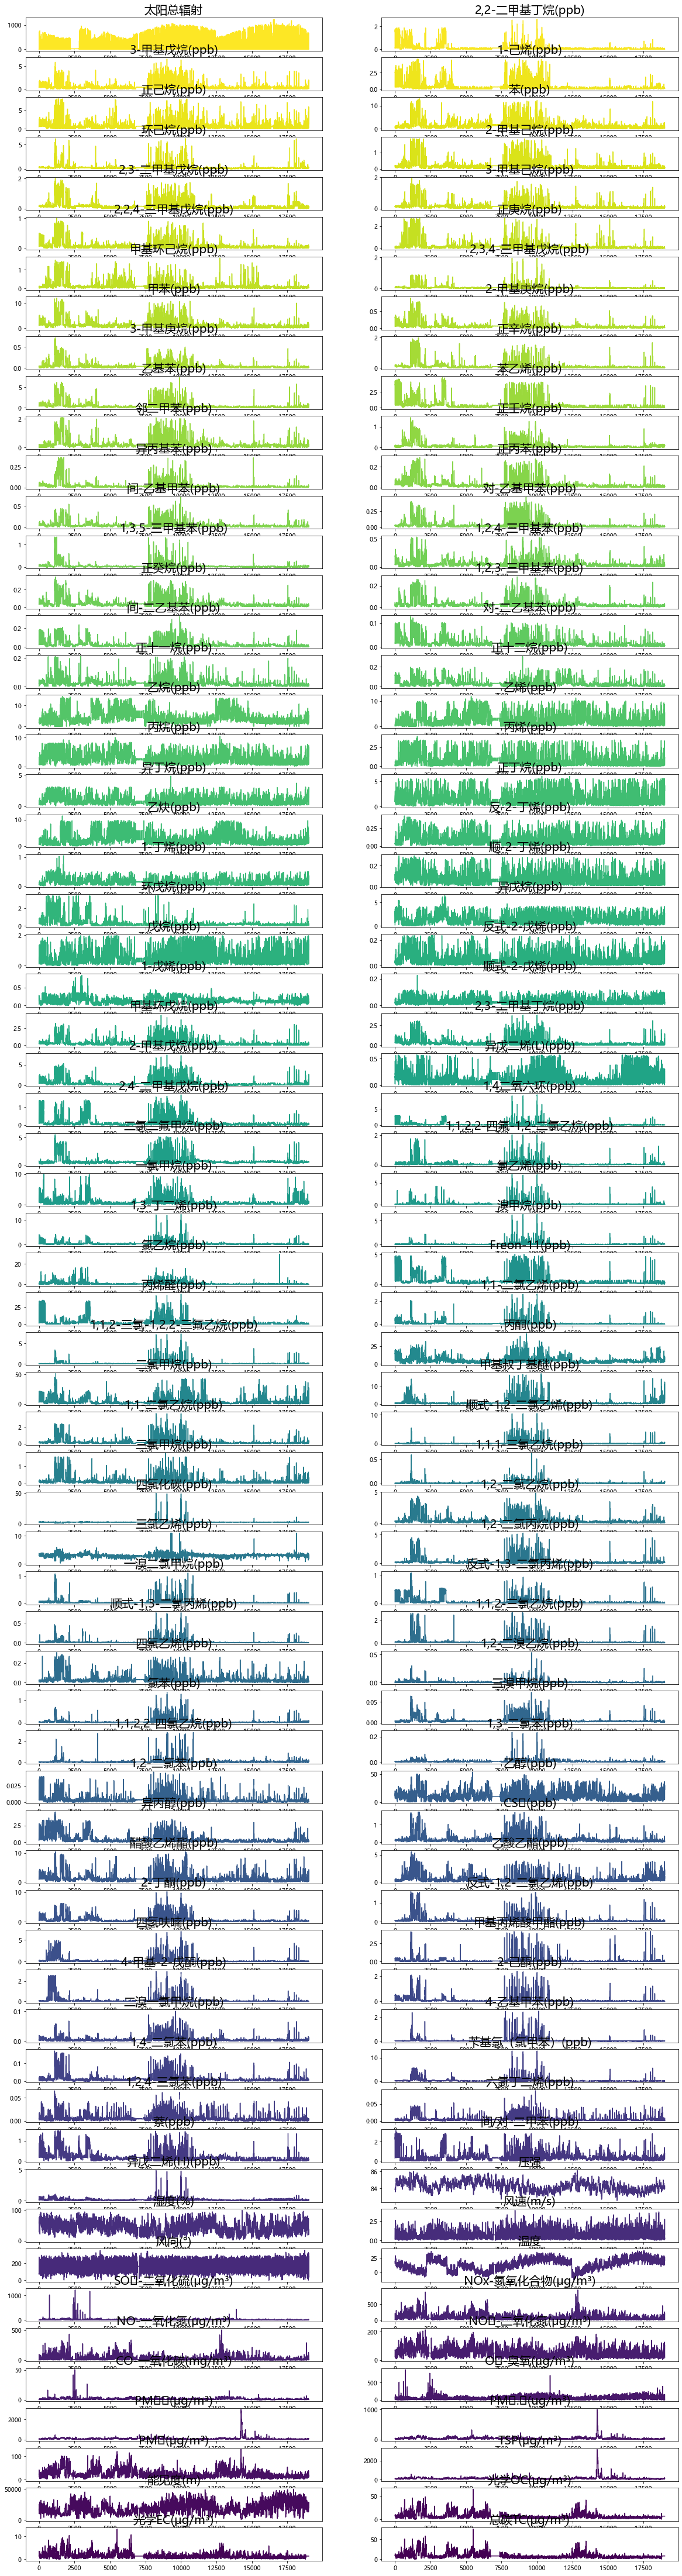

In [99]:
fig = plt.figure(figsize=(20,80))
for i,j in enumerate(tqdm(df.columns[1:])):
#    print(i,j, "\t")
    plt.subplot(round(df.columns.size/2),2,i+1)
    plt.plot(df[j], color=cm.viridis_r(i/(df.columns.size-2)))
    plt.title(j, fontsize=20)

## Correlation

<AxesSubplot:>

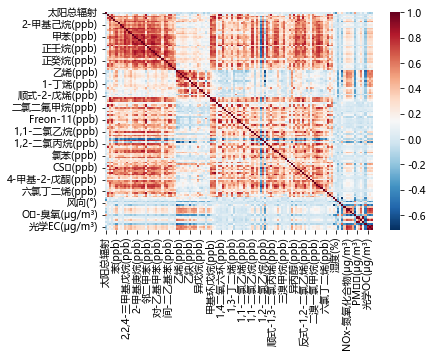

In [63]:
heatmap(df.corr(), cmap=cm.RdBu_r)